# Domain Classifier
This note books explored build ml model to predict domain (but didn't work well)
by grace 14/09/2023

In [75]:
import pandas as pd
import json

data3 = []
test = []

# Assuming the NDJSON data is stored in a file called 'data.ndjson'
with open("../data/domain1_train.json", 'r') as file:
    for line in file:
        dict = json.loads(line.strip())
        dict["domain"] = 1
        data3.append(dict)
# Assuming the NDJSON data is stored in a file called 'data.ndjson'
with open("../data/domain2_train.json", 'r') as file:
    for line in file:
        dict = json.loads(line.strip())
        dict["domain"] = 2
        data3.append(dict)

with open("../data/test_set.json", 'r') as file:
    for line in file:
        dict = json.loads(line.strip())
        test.append(dict)

test_strings = [' '.join(map(str, sample['text'])) for sample in test]


In [387]:
data1 = []
data2 = []
# Assuming the NDJSON data is stored in a file called 'data.ndjson'
with open("../data/domain1_train.json", 'r') as file:
    for line in file:
        dict = json.loads(line.strip())
        dict["domain"] = 1
        data1.append(dict)
# Assuming the NDJSON data is stored in a file called 'data.ndjson'
with open("../data/domain2_train.json", 'r') as file:
    for line in file:
        dict = json.loads(line.strip())
        dict["domain"] = 2
        data2.append(dict)

data_string1 = [' '.join(map(str, sample['text'])) for sample in data1]
data_string2 = [' '.join(map(str, sample['text'])) for sample in data2]
data_string3 = [' '.join(map(str, sample['text'])) for sample in data3]

df3 = pd.DataFrame(data3)
df2 = pd.DataFrame(data2)
df1 = pd.DataFrame(data1)
test = pd.DataFrame(test)

y1 = df1['label']
y2 = df2['label']


In [30]:
df2

text  label  domain  model
0      [3147, 471, 4, 343, 2, 0, 1, 14, 124, 133, 436...      1       2    7.0
1      [10, 389, 232, 24, 2, 0, 4730, 1, 13, 10, 129,...      1       2    7.0
2      [861, 0, 2505, 2, 0, 1015, 2, 0, 3, 1772, 8, 3...      1       2    7.0
3      [325, 21, 3234, 1, 14, 187, 16, 13, 1965, 1, 1...      1       2    7.0
4      [5, 1091, 272, 6, 3232, 32, 2, 1012, 4, 3240, ...      1       2    7.0
...                                                  ...    ...     ...    ...
14895  [175, 1317, 38, 754, 9, 5, 0, 228, 1, 45, 6, 2...      0       2    1.0
14896  [466, 5, 70, 1242, 6, 3888, 1, 34, 43, 5, 70, ...      0       2    3.0
14897  [10, 0, 21, 1650, 18, 5, 1335, 1, 208, 5, 997,...      0       2    1.0
14898  [18, 39, 316, 133, 365, 2019, 1, 27, 10, 5, 61...      0       2    4.0
14899  [10, 0, 859, 36, 860, 765, 250, 1, 872, 3, 27,...      0       2    6.0

[14900 rows x 4 columns]

In [31]:
df1

text  label  domain
0      [70, 746, 825, 109, 2083, 0, 2, 0, 0, 0, 9, 0,...      1       1
1      [1209, 179, 1952, 4, 4959, 7, 0, 2, 978, 1522,...      1       1
2      [287, 3, 3330, 0, 23, 12, 13, 465, 74, 8, 0, 8...      1       1
3      [0, 0, 3, 592, 19, 2, 706, 1439, 2575, 7, 2, 0...      1       1
4      [9, 2, 110, 12, 42, 32, 44, 361, 9, 3860, 2358...      1       1
...                                                  ...    ...     ...
19495  [3987, 4, 2, 2536, 3611, 3, 5, 1125, 269, 2324...      0       1
19496  [2, 132, 87, 980, 4, 2, 379, 12, 1336, 38, 299...      0       1
19497  [1820, 93, 3, 548, 1, 1072, 1, 3, 2, 2741, 104...      0       1
19498  [5, 48, 6, 2662, 17, 9, 5, 902, 2, 48, 6, 84, ...      0       1
19499  [126, 1, 199, 0, 3, 718, 126, 1, 199, 3275, 31...      0       1

[19500 rows x 3 columns]

In [26]:
df3#.describe()

text  label  domain  model
0      [70, 746, 825, 109, 2083, 0, 2, 0, 0, 0, 9, 0,...      1       1    NaN
1      [1209, 179, 1952, 4, 4959, 7, 0, 2, 978, 1522,...      1       1    NaN
2      [287, 3, 3330, 0, 23, 12, 13, 465, 74, 8, 0, 8...      1       1    NaN
3      [0, 0, 3, 592, 19, 2, 706, 1439, 2575, 7, 2, 0...      1       1    NaN
4      [9, 2, 110, 12, 42, 32, 44, 361, 9, 3860, 2358...      1       1    NaN
...                                                  ...    ...     ...    ...
34395  [175, 1317, 38, 754, 9, 5, 0, 228, 1, 45, 6, 2...      0       2    1.0
34396  [466, 5, 70, 1242, 6, 3888, 1, 34, 43, 5, 70, ...      0       2    3.0
34397  [10, 0, 21, 1650, 18, 5, 1335, 1, 208, 5, 997,...      0       2    1.0
34398  [18, 39, 316, 133, 365, 2019, 1, 27, 10, 5, 61...      0       2    4.0
34399  [10, 0, 859, 36, 860, 765, 250, 1, 872, 3, 27,...      0       2    6.0

[34400 rows x 4 columns]

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
df = df3

# 1. Basic Data Understanding
print(df.describe())
print(df['label'].value_counts())
print(df['model'].value_counts())
df.groupby('domain').size()


              label        domain         model
count  34400.000000  34400.000000  12750.000000
mean       0.345930      1.433140      2.489647
std        0.475678      0.495517      1.970409
min        0.000000      1.000000      0.000000
25%        0.000000      1.000000      1.000000
50%        0.000000      1.000000      2.000000
75%        1.000000      2.000000      4.000000
max        1.000000      2.000000      6.000000
0    22500
1    11900
Name: label, dtype: int64
0.0    2364
3.0    2358
1.0    2357
2.0    2339
6.0    1763
4.0     789
5.0     780
Name: model, dtype: int64


domain
1    19500
2    14900
dtype: int64

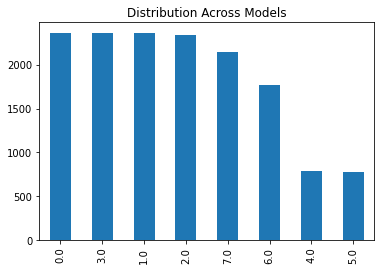

In [32]:
# 2. Model Distribution
df2['model'].value_counts().plot(kind='bar')
plt.title('Distribution Across Models')
plt.show()

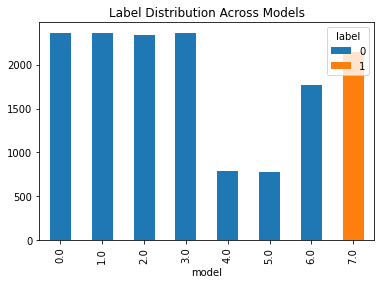

In [33]:
# 3. Label Distribution per Model
pd.crosstab(df2['model'], df2['label']).plot(kind='bar', stacked=True)
plt.title('Label Distribution Across Models')
plt.show()

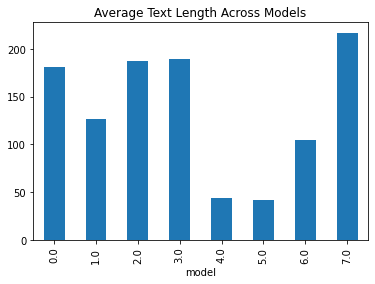

In [37]:
# 4. Average Text Length per Model
df2['text_length'] = df2['text'].apply(len)
df2.groupby('model')['text_length'].mean().plot(kind='bar')
plt.title('Average Text Length Across Models')
plt.show()


In [16]:
model_counts = df3.groupby("model").size().reset_index(name="count")
print(model_counts)

   model  count
0    0.0   2364
1    1.0   2357
2    2.0   2339
3    3.0   2358
4    4.0    789
5    5.0    780
6    6.0   1763


IndexError: index 7 is out of bounds for axis 0 with size 7

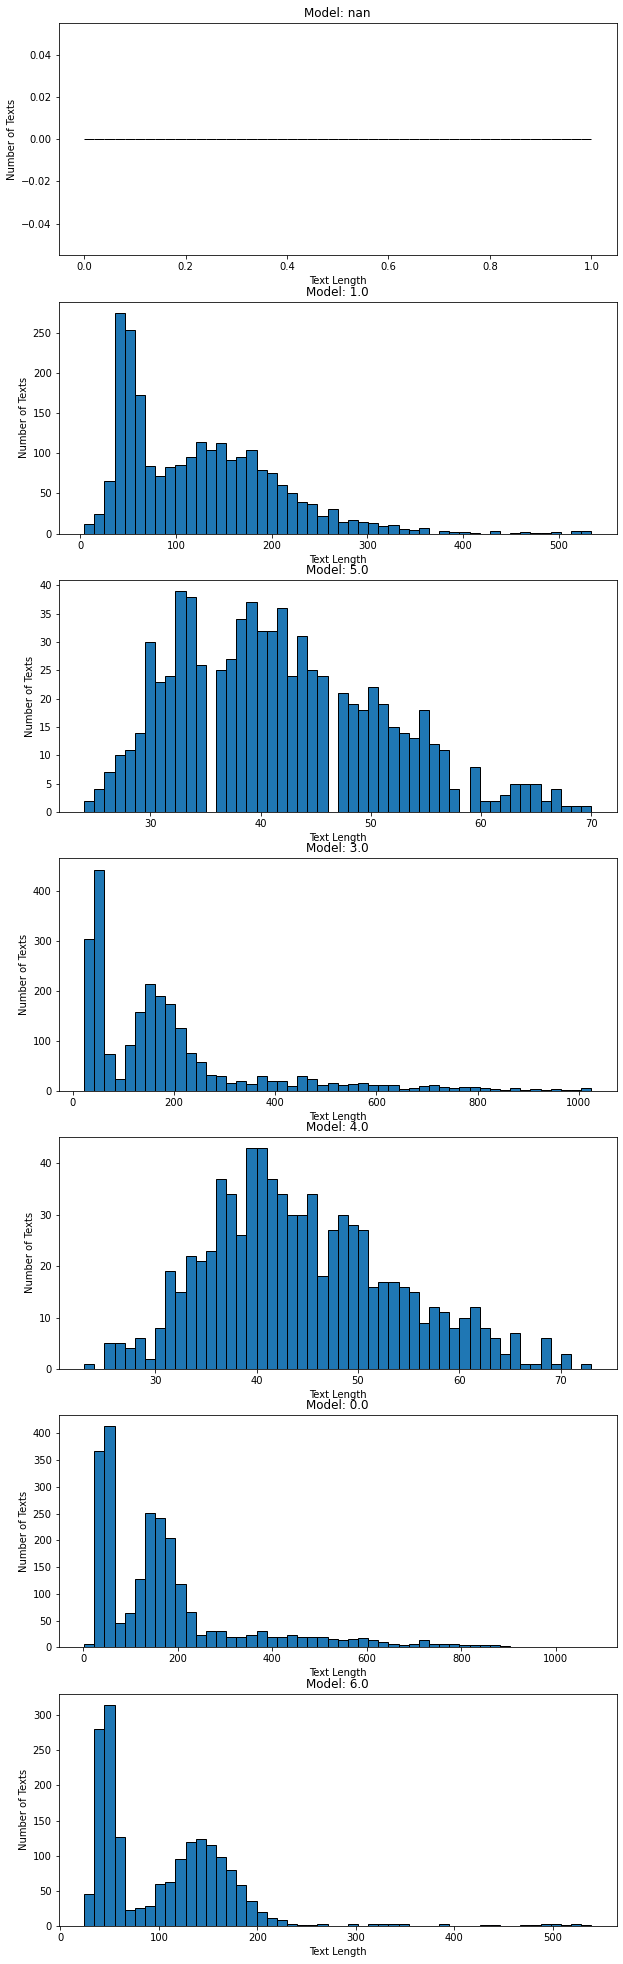

In [15]:
num_models = df['model'].nunique()
models = df['model'].unique()

# Create a new column for text length
df['text_length'] = df['text'].apply(len)

# Setup figure and axes
fig, axes = plt.subplots(nrows=num_models, figsize=(10, 5 * num_models))

# Create a subplot for each model
for i, model in enumerate(models):
    subset = df[df['model'] == model]
    axes[i].hist(subset['text_length'], bins=50, edgecolor='black')
    axes[i].set_title(f'Model: {model}')
    axes[i].set_xlabel('Text Length')
    axes[i].set_ylabel('Number of Texts')

plt.tight_layout()
plt.show()




## Domain classifier building

In [40]:
df3

text  label  domain  model
0      [70, 746, 825, 109, 2083, 0, 2, 0, 0, 0, 9, 0,...      1       1    NaN
1      [1209, 179, 1952, 4, 4959, 7, 0, 2, 978, 1522,...      1       1    NaN
2      [287, 3, 3330, 0, 23, 12, 13, 465, 74, 8, 0, 8...      1       1    NaN
3      [0, 0, 3, 592, 19, 2, 706, 1439, 2575, 7, 2, 0...      1       1    NaN
4      [9, 2, 110, 12, 42, 32, 44, 361, 9, 3860, 2358...      1       1    NaN
...                                                  ...    ...     ...    ...
34395  [175, 1317, 38, 754, 9, 5, 0, 228, 1, 45, 6, 2...      0       2    1.0
34396  [466, 5, 70, 1242, 6, 3888, 1, 34, 43, 5, 70, ...      0       2    3.0
34397  [10, 0, 21, 1650, 18, 5, 1335, 1, 208, 5, 997,...      0       2    1.0
34398  [18, 39, 316, 133, 365, 2019, 1, 27, 10, 5, 61...      0       2    4.0
34399  [10, 0, 859, 36, 860, 765, 250, 1, 872, 3, 27,...      0       2    6.0

[34400 rows x 4 columns]

### Adapt the KNN function to classify domain (binary classifier)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

results = []
def train_KNN(domain, data, labels,gram):
    preprocess_methods = ["bow", "tfidf"]
    balance_methods = ["NA", "RandomOverSampler", "SMOTE", "RandomUnderSampler"]

    for preprocess in preprocess_methods:
        if preprocess == "bow":
            bow_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,gram))
            X = bow_vectorizer.fit_transform(data)
            #print(X.shape, labels.shape)

        elif preprocess == "tfidf":
            tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,gram))
            X = tfidf_vectorizer.fit_transform(data)

        for balance in balance_methods:
            X_train, y_train = X, labels  # default to original data
            #print(X_train.shape, y_train.shape)

            if balance == "RandomOverSampler":
                ros = RandomOverSampler(random_state=42)
                X_train, y_train = ros.fit_resample(X, labels)
            elif balance == "SMOTE":
                smote = SMOTE(random_state=42)
                X_train, y_train = smote.fit_resample(X, labels)
            elif balance == "RandomUnderSampler":
                rus = RandomUnderSampler(random_state=42)
                X_train, y_train = rus.fit_resample(X, labels)

            # Create a KNN classifier instance
            knn = KNeighborsClassifier()

            scoring = ['accuracy', 'precision', 'recall', 'f1']
            scores = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)

            avg_accuracy = scores['test_accuracy'].mean()
            avg_precision = scores['test_precision'].mean()
            avg_recall = scores['test_recall'].mean()
            avg_f1 = scores['test_f1'].mean()

            result = {
                "Model": "KNN",
                "Domain": domain,
                "Preprocess": preprocess,
                "Imbalanced handle": balance,
                "n-gram": f'(1,{gram})',  # Adjust if you change ngram_range in vectorizers
                "parameters": "default KNN",
                "cross validation (avg. accuracy)": avg_accuracy,
                "cross validation (avg. precision)": avg_precision,
                "cross validation (avg. recall)": avg_recall,
                "cross validation (avg. F1)": avg_f1,
                "additional notes": ""
            }

            results.append(result)


# Use the function
# Assuming `texts` is a list of tokenized texts and `labels` is their corresponding labels.
#texts = [" ".join(map(str, text)) for text in dataset['text']] # Convert token lists to space separated strings
#labels = dataset['label']


In [59]:

data_strings3 = [' '.join(map(str, sample['text'])) for sample in data3]
y3 = df3['domain']
data_strings3

['70 746 825 109 2083 0 2 0 0 0 9 0 1004 19 0 0 7 913',
 '1209 179 1952 4 4959 7 0 2 978 1522 6 2874 1051 1',
 '287 3 3330 0 23 12 13 465 74 8 0 8 4 1809 82 8 4180 3378 8 22 0 0 3149 0 7 1862 4 2960 607 797 7 89 0 1927 9 70 1232 1',
 '0 0 3 592 19 2 706 1439 2575 7 2 0 4680 2575 3 38 2529 1',
 '9 2 110 12 42 32 44 361 9 3860 2358 3 42 32 0 398 473 6 260 1579 232 0 4 0 2960 0 1',
 '9 892 3 0 0 3 2 0 811 3 26 939 13 60 122 902 16 0 4 1076 2 1056 963 400 1067 13 1512 994 4 32 74 4558 3 338 1883 1198 108 2 2087 1',
 '0 1115 0 72 192 64 31 3295 33 0 1',
 '2 1510 0 9 30 138 118 2 0 0 0 5 0 12 3 59 4547 4 0 3 2119 22 40 0 0 3 0 0 7 0 0 415 2 0 1',
 '0 1398 324 41 1629 0 4162 0 4 3020 2 0 24 21 0 1',
 '9 5 940 4 394 3 2 537 8 15 773 3 809 0 3 23 70 515 26 3171 40 1524 925 6 2 112 12 780 9 868 1',
 '2 900 486 269 3 269 28 3 778 3 587 3 587 28 3 165 3 165 28 3 3858 3 150 3 7 0 9 30 2353 38 4 31 0 22 1205 9 0 0 1',
 '4 200 39 279 2828 4 5 1684 0 3 11 2430 52 5 0 650 130 0 6 0 38 0 52 4 1119 49 35

In [60]:

train_KNN("domain1+2", data_strings3, y3,1)
df_results = pd.DataFrame(results)
df_results

Model     Domain Preprocess   Imbalanced handle n-gram   parameters  \
0   KNN  domain1+2        bow                  NA  (1,1)  default KNN   
1   KNN  domain1+2        bow   RandomOverSampler  (1,1)  default KNN   
2   KNN  domain1+2        bow               SMOTE  (1,1)  default KNN   
3   KNN  domain1+2        bow  RandomUnderSampler  (1,1)  default KNN   
4   KNN  domain1+2      tfidf                  NA  (1,1)  default KNN   
5   KNN  domain1+2      tfidf   RandomOverSampler  (1,1)  default KNN   
6   KNN  domain1+2      tfidf               SMOTE  (1,1)  default KNN   
7   KNN  domain1+2      tfidf  RandomUnderSampler  (1,1)  default KNN   

   cross validation (avg. accuracy)  cross validation (avg. precision)  \
0                          0.865552                           0.810121   
1                          0.873077                           0.800077   
2                          0.690359                           0.888484   
3                          0.853087                           0.774778   
4                          0.687645                           0.645258   
5                          0.700256                           0.626408   
6                          0.574692                           0.979143   
7                          0.640235                           0.581935   

   cross validation (avg. recall)  cross validation (avg. F1) additional notes  
0                        0.996410                    0.893654                   
1                        0.994974                    0.886906                   
2                        0.423846                    0.517489                   
3                        0.995638                    0.871426                   
4                        0.998103                    0.783753                   
5                        0.996821                    0.769146                   
6                        0.152769                    0.243477                   
7                        0.998255                    0.735191

In [61]:
train_KNN("domain1+2", data_strings3, y3,3)
df_results2 = pd.DataFrame(results)
df_results2

Model     Domain Preprocess   Imbalanced handle n-gram   parameters  \
0    KNN  domain1+2        bow                  NA  (1,1)  default KNN   
1    KNN  domain1+2        bow   RandomOverSampler  (1,1)  default KNN   
2    KNN  domain1+2        bow               SMOTE  (1,1)  default KNN   
3    KNN  domain1+2        bow  RandomUnderSampler  (1,1)  default KNN   
4    KNN  domain1+2      tfidf                  NA  (1,1)  default KNN   
5    KNN  domain1+2      tfidf   RandomOverSampler  (1,1)  default KNN   
6    KNN  domain1+2      tfidf               SMOTE  (1,1)  default KNN   
7    KNN  domain1+2      tfidf  RandomUnderSampler  (1,1)  default KNN   
8    KNN  domain1+2        bow                  NA  (1,3)  default KNN   
9    KNN  domain1+2        bow   RandomOverSampler  (1,3)  default KNN   
10   KNN  domain1+2        bow               SMOTE  (1,3)  default KNN   
11   KNN  domain1+2        bow  RandomUnderSampler  (1,3)  default KNN   
12   KNN  domain1+2      tfidf                  NA  (1,3)  default KNN   
13   KNN  domain1+2      tfidf   RandomOverSampler  (1,3)  default KNN   
14   KNN  domain1+2      tfidf               SMOTE  (1,3)  default KNN   
15   KNN  domain1+2      tfidf  RandomUnderSampler  (1,3)  default KNN   

    cross validation (avg. accuracy)  cross validation (avg. precision)  \
0                           0.865552                           0.810121   
1                           0.873077                           0.800077   
2                           0.690359                           0.888484   
3                           0.853087                           0.774778   
4                           0.687645                           0.645258   
5                           0.700256                           0.626408   
6                           0.574692                           0.979143   
7                           0.640235                           0.581935   
8                           0.855029                           0.797744   
9                           0.860949                           0.784337   
10                          0.731897                           0.922661   
11                          0.841141                           0.760148   
12                          0.643140                           0.614058   
13                          0.642564                           0.584621   
14                          0.574513                           0.973970   
15                          0.588691                           0.548867   

    cross validation (avg. recall)  cross validation (avg. F1)  \
0                         0.996410                    0.893654   
1                         0.994974                    0.886906   
2                         0.423846                    0.517489   
3                         0.995638                    0.871426   
4                         0.998103                    0.783753   
5                         0.996821                    0.769146   
6                         0.152769                    0.243477   
7                         0.998255                    0.735191   
8                         0.997128                    0.886353   
9                         0.995897                    0.877514   
10                        0.503590                    0.611922   
11                        0.996846                    0.862550   
12                        0.997846                    0.760236   
13                        0.990821                    0.735150   
14                        0.154051                    0.244719   
15                        0.997987                    0.708199   

   additional notes  
0                    
1                    
2                    
3                    
4                    
5                    
6                    
7                    
8                    
9                    
10                   
11                   
12                   
13                   
14             

the first model has the highest accuracy

In [62]:
from sklearn.linear_model import LogisticRegression

def train_LogisticRegression(domain, data, labels, gram):
    preprocess_methods = ["bow", "tfidf"]
    balance_methods = ["NA", "RandomOverSampler", "SMOTE", "RandomUnderSampler"]

    for preprocess in preprocess_methods:
        if preprocess == "bow":
            bow_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, gram))
            X = bow_vectorizer.fit_transform(data)
        elif preprocess == "tfidf":
            tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, gram))
            X = tfidf_vectorizer.fit_transform(data)

        for balance in balance_methods:
            X_train, y_train = X, labels

            if balance == "RandomOverSampler":
                ros = RandomOverSampler(random_state=42)
                X_train, y_train = ros.fit_resample(X, labels)
            elif balance == "SMOTE":
                smote = SMOTE(random_state=42)
                X_train, y_train = smote.fit_resample(X, labels)
            elif balance == "RandomUnderSampler":
                rus = RandomUnderSampler(random_state=42)
                X_train, y_train = rus.fit_resample(X, labels)

            log_reg = LogisticRegression(max_iter=10000)

            scoring = ['accuracy', 'precision', 'recall', 'f1']
            scores = cross_validate(log_reg, X_train, y_train, cv=5, scoring=scoring)

            avg_accuracy = scores['test_accuracy'].mean()
            avg_precision = scores['test_precision'].mean()
            avg_recall = scores['test_recall'].mean()
            avg_f1 = scores['test_f1'].mean()

            result = {
                "Model": "Logistic Regression",
                "Domain": domain,
                "Preprocess": preprocess,
                "Imbalanced handle": balance,
                "n-gram": f'(1,{gram})',
                "parameters": "default Logistic Regression",
                "cross validation (avg. accuracy)": avg_accuracy,
                "cross validation (avg. precision)": avg_precision,
                "cross validation (avg. recall)": avg_recall,
                "cross validation (avg. F1)": avg_f1,
                "additional notes": ""
            }

            results.append(result)
train_LogisticRegression("domain1+2", data_strings3, y3,3)
df_results2 = pd.DataFrame(results)

In [63]:
df_results2

Model     Domain Preprocess   Imbalanced handle n-gram  \
0                   KNN  domain1+2        bow                  NA  (1,1)   
1                   KNN  domain1+2        bow   RandomOverSampler  (1,1)   
2                   KNN  domain1+2        bow               SMOTE  (1,1)   
3                   KNN  domain1+2        bow  RandomUnderSampler  (1,1)   
4                   KNN  domain1+2      tfidf                  NA  (1,1)   
5                   KNN  domain1+2      tfidf   RandomOverSampler  (1,1)   
6                   KNN  domain1+2      tfidf               SMOTE  (1,1)   
7                   KNN  domain1+2      tfidf  RandomUnderSampler  (1,1)   
8                   KNN  domain1+2        bow                  NA  (1,3)   
9                   KNN  domain1+2        bow   RandomOverSampler  (1,3)   
10                  KNN  domain1+2        bow               SMOTE  (1,3)   
11                  KNN  domain1+2        bow  RandomUnderSampler  (1,3)   
12                  KNN  domain1+2      tfidf                  NA  (1,3)   
13                  KNN  domain1+2      tfidf   RandomOverSampler  (1,3)   
14                  KNN  domain1+2      tfidf               SMOTE  (1,3)   
15                  KNN  domain1+2      tfidf  RandomUnderSampler  (1,3)   
16  Logistic Regression  domain1+2        bow                  NA  (1,3)   
17  Logistic Regression  domain1+2        bow   RandomOverSampler  (1,3)   
18  Logistic Regression  domain1+2        bow               SMOTE  (1,3)   
19  Logistic Regression  domain1+2        bow  RandomUnderSampler  (1,3)   
20  Logistic Regression  domain1+2      tfidf                  NA  (1,3)   
21  Logistic Regression  domain1+2      tfidf   RandomOverSampler  (1,3)   
22  Logistic Regression  domain1+2      tfidf               SMOTE  (1,3)   
23  Logistic Regression  domain1+2      tfidf  RandomUnderSampler  (1,3)   

                     parameters  cross validation (avg. accuracy)  \
0                   default KNN                          0.865552   
1                   default KNN                          0.873077   
2                   default KNN                          0.690359   
3                   default KNN                          0.853087   
4                   default KNN                          0.687645   
5                   default KNN                          0.700256   
6                   default KNN                          0.574692   
7                   default KNN                          0.640235   
8                   default KNN                          0.855029   
9                   default KNN                          0.860949   
10                  default KNN                          0.731897   
11                  default KNN                          0.841141   
12                  default KNN                          0.643140   
13                  default KNN                          0.642564   
14                  default KNN                          0.574513   
15                  default KNN                          0.588691   
16  default Logistic Regression                          0.981860   
17  default Logistic Regression                          0.984846   
18  default Logistic Regression                          0.954667   
19  default Logistic Regression                          0.980671   
20  default Logistic Regression                          0.966715   
21  default Logistic Regression                          0.969872   
22  default Logistic Regression                          0.942359   
23  default Logistic Regression                          0.966141   

    cross validation (avg. precision)  cross validation (avg. recall)  \
0                            0.810121                        0.996410   
1                            0.800077                        0.994974   
2                            0.888484                        0.423846   
3                            0.774778                        0.995638   
4                         

In [64]:
train_LogisticRegression("domain1+2", data_strings3, y3,1)
df_results3 = pd.DataFrame(results)
df_results3

Model     Domain Preprocess   Imbalanced handle n-gram  \
0                   KNN  domain1+2        bow                  NA  (1,1)   
1                   KNN  domain1+2        bow   RandomOverSampler  (1,1)   
2                   KNN  domain1+2        bow               SMOTE  (1,1)   
3                   KNN  domain1+2        bow  RandomUnderSampler  (1,1)   
4                   KNN  domain1+2      tfidf                  NA  (1,1)   
5                   KNN  domain1+2      tfidf   RandomOverSampler  (1,1)   
6                   KNN  domain1+2      tfidf               SMOTE  (1,1)   
7                   KNN  domain1+2      tfidf  RandomUnderSampler  (1,1)   
8                   KNN  domain1+2        bow                  NA  (1,3)   
9                   KNN  domain1+2        bow   RandomOverSampler  (1,3)   
10                  KNN  domain1+2        bow               SMOTE  (1,3)   
11                  KNN  domain1+2        bow  RandomUnderSampler  (1,3)   
12                  KNN  domain1+2      tfidf                  NA  (1,3)   
13                  KNN  domain1+2      tfidf   RandomOverSampler  (1,3)   
14                  KNN  domain1+2      tfidf               SMOTE  (1,3)   
15                  KNN  domain1+2      tfidf  RandomUnderSampler  (1,3)   
16  Logistic Regression  domain1+2        bow                  NA  (1,3)   
17  Logistic Regression  domain1+2        bow   RandomOverSampler  (1,3)   
18  Logistic Regression  domain1+2        bow               SMOTE  (1,3)   
19  Logistic Regression  domain1+2        bow  RandomUnderSampler  (1,3)   
20  Logistic Regression  domain1+2      tfidf                  NA  (1,3)   
21  Logistic Regression  domain1+2      tfidf   RandomOverSampler  (1,3)   
22  Logistic Regression  domain1+2      tfidf               SMOTE  (1,3)   
23  Logistic Regression  domain1+2      tfidf  RandomUnderSampler  (1,3)   
24  Logistic Regression  domain1+2        bow                  NA  (1,1)   
25  Logistic Regression  domain1+2        bow   RandomOverSampler  (1,1)   
26  Logistic Regression  domain1+2        bow               SMOTE  (1,1)   
27  Logistic Regression  domain1+2        bow  RandomUnderSampler  (1,1)   
28  Logistic Regression  domain1+2      tfidf                  NA  (1,1)   
29  Logistic Regression  domain1+2      tfidf   RandomOverSampler  (1,1)   
30  Logistic Regression  domain1+2      tfidf               SMOTE  (1,1)   
31  Logistic Regression  domain1+2      tfidf  RandomUnderSampler  (1,1)   

                     parameters  cross validation (avg. accuracy)  \
0                   default KNN                          0.865552   
1                   default KNN                          0.873077   
2                   default KNN                          0.690359   
3                   default KNN                          0.853087   
4                   default KNN                          0.687645   
5                   default KNN                          0.700256   
6                   default KNN                          0.574692   
7                   default KNN                          0.640235   
8                   default KNN                          0.855029   
9                   default KNN                          0.860949   
10                  default KNN                          0.731897   
11                  default KNN                          0.841141   
12                  default KNN                          0.643140   
13                  default KNN                          0.642564   
14                  default KNN                          0.574513   
15                  default KNN                          0.588691   
16  default Logistic Regression                          0.981860   
17  default Logistic Regression                          0.984846   
18  default Logistic Regression                          0.954667   
19  default Logistic Regression                          0.980671   
20  default Logistic Regression                          0.9

Logistic Regression	domain1+2	bow	RandomOverSampler	(1,3): the best

In [423]:
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming data and labels are already loaded in
# data represents your texts from domain1+2 and labels are their corresponding labels

# 1. Vectorization using Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000, ngram_range=(2,3))
X = bow_vectorizer.fit_transform(data_strings3)

# Split data for training and testing (adjust test size as needed)
labels = y3
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# 2. Handle Class Imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# 3. Training the Logistic Regression Model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_resampled, y_resampled)

# Predict and evaluate on test set
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.95      0.98      0.97      3951
           2       0.98      0.94      0.96      2929

    accuracy                           0.96      6880
   macro avg       0.97      0.96      0.96      6880
weighted avg       0.96      0.96      0.96      6880



In [424]:
X_pred= bow_vectorizer.fit_transform(test_strings)
y_pred = log_reg.predict(X_pred)


In [425]:
count_1 = list(y_pred).count(1)
count_2 = list(y_pred).count(2)
print(f'Number of 1s: {count_1}')
print(f'Number of 2s: {count_2}')


Number of 1s: 587
Number of 2s: 413


In [103]:
test['domain'] = list(y_pred)

In [105]:
test

id                                               text  domain
0      0  [59, 2, 3434, 1013, 823, 2, 887, 6, 2375, 0, 3...       1
1      1  [2, 785, 6, 5, 0, 317, 17, 5, 2970, 3654, 858,...       2
2      2                     [3306, 4, 2, 2288, 6, 963, 94]       1
3      3  [0, 2, 1021, 38, 126, 1, 907, 1, 761, 1, 3357,...       1
4      4  [30, 488, 197, 18, 4, 31, 420, 18, 2, 3577, 6,...       2
..   ...                                                ...     ...
995  995  [45, 88, 79, 503, 501, 134, 35, 147, 301, 0, 1...       1
996  996  [0, 0, 8, 15, 0, 810, 3, 2337, 9, 4653, 3, 41,...       1
997  997  [2, 495, 752, 17, 128, 9, 2, 3361, 6, 458, 131...       1
998  998  [2, 4433, 299, 307, 12, 100, 0, 446, 32, 44, 0...       1
999  999  [9, 1017, 4, 1394, 0, 61, 365, 2539, 3, 0, 7, ...       2

[1000 rows x 3 columns]

In [107]:
d1 = test[test['domain'] == 1]
d2 = test[test['domain'] == 2]

In [ ]:
train_KNN("domain1", data_string1, y1,1)
df_results = pd.DataFrame(results)
df_results

In [112]:
results = []
train_LogisticRegression("domain1", data_string1, y1,1)
train_LogisticRegression("domain1", data_string1, y1,3)
df_results_d1 = pd.DataFrame(results)

In [113]:
df_results_d1

Model   Domain Preprocess   Imbalanced handle n-gram  \
0   Logistic Regression  domain1        bow                  NA  (1,1)   
1   Logistic Regression  domain1        bow   RandomOverSampler  (1,1)   
2   Logistic Regression  domain1        bow               SMOTE  (1,1)   
3   Logistic Regression  domain1        bow  RandomUnderSampler  (1,1)   
4   Logistic Regression  domain1      tfidf                  NA  (1,1)   
5   Logistic Regression  domain1      tfidf   RandomOverSampler  (1,1)   
6   Logistic Regression  domain1      tfidf               SMOTE  (1,1)   
7   Logistic Regression  domain1      tfidf  RandomUnderSampler  (1,1)   
8   Logistic Regression  domain1        bow                  NA  (1,3)   
9   Logistic Regression  domain1        bow   RandomOverSampler  (1,3)   
10  Logistic Regression  domain1        bow               SMOTE  (1,3)   
11  Logistic Regression  domain1        bow  RandomUnderSampler  (1,3)   
12  Logistic Regression  domain1      tfidf                  NA  (1,3)   
13  Logistic Regression  domain1      tfidf   RandomOverSampler  (1,3)   
14  Logistic Regression  domain1      tfidf               SMOTE  (1,3)   
15  Logistic Regression  domain1      tfidf  RandomUnderSampler  (1,3)   

                     parameters  cross validation (avg. accuracy)  \
0   default Logistic Regression                          0.907333   
1   default Logistic Regression                          0.907333   
2   default Logistic Regression                          0.907333   
3   default Logistic Regression                          0.907949   
4   default Logistic Regression                          0.904154   
5   default Logistic Regression                          0.904154   
6   default Logistic Regression                          0.904154   
7   default Logistic Regression                          0.903692   
8   default Logistic Regression                          0.907949   
9   default Logistic Regression                          0.907949   
10  default Logistic Regression                          0.907949   
11  default Logistic Regression                          0.908769   
12  default Logistic Regression                          0.902667   
13  default Logistic Regression                          0.902667   
14  default Logistic Regression                          0.902667   
15  default Logistic Regression                          0.903692   

    cross validation (avg. precision)  cross validation (avg. recall)  \
0                            0.886525                        0.934256   
1                            0.886525                        0.934256   
2                            0.886525                        0.934256   
3                            0.887191                        0.934769   
4                            0.860729                        0.964410   
5                            0.860729                        0.964410   
6                            0.860729                        0.964410   
7                            0.859978                        0.964513   
8                            0.884804                        0.938051   
9                            0.884804                        0.938051   
10                           0.884804                        0.938051   
11                           0.885121                        0.939487   
12                           0.861425                        0.959795   
13                           0.861425                        0.959795   
14                           0.861425                        0.959795   
15                           0.862618                        0.960410   

    cross validation (avg. F1) additional notes  
0                     0.909756                   
1                     0.909756                   
2                     0.909756                   
3                     0.910355                   
4                     0.909609                   
5                     0.909609             

In [289]:
d1_strings = [' '.join(map(str, lst)) for lst in d1['text']]
d2_strings = [' '.join(map(str, lst)) for lst in d2['text']]

In [290]:
d1_strings

['59 2 3434 1013 823 2 887 6 2375 0 34 43 584 18 0 0 6 686 1 56 43 2881 1107 0 287 1495 9 2 1013 71 447 2 3519 0 118 13 10 532 81 1 13 8 15 329 10 0 1 0 1 0 1 5 4083 1372 2938 3 7 13 41 0 120 156 4752 1013 1 30 4083 11 269 661 114 4 2 3217 6 713 1 944 57 4 0 551 1 39 329 17 0 1565 0 1 11 240 5 802 6 2 0 1683 0 6 0 7 6 2 0 6 0 3 74 0 422 22 2 0 0 1 11 10 186 497 842 3490 144 33 2 0 6 451 3 202 73 11 55 774 608 1 11 32 1122 22 2 4083 3 0 3 2671 4744 136 120 1013 3 270 4 945 157 2620 1 59 2 0 3782 2671 0 0 7 821 81 415 1226 1381 7 2 688 1043 3 5 0 0 681 6 0 7 0 1 0 3 2 574 6 3537 1134 157 7 89 0 2155 4 661 30 0 4 2 2381 1',
 '3306 4 2 2288 6 963 94',
 '0 2 1021 38 126 1 907 1 761 1 3357 7 126 1 281 1 1418 1 0 3 49 3173 2 411 9 528 1',
 '0 1041 0 2424 862 54 63 3048 62 3661 4460 92',
 '695 4297 16 0 24 2 2357 549 2785 3 45 0 2192 9 2 48 494 133 0 1',
 '20 38 0 2458 3 5 2247 1109 49 0 706 106 1241 33 5 156 0 0 609 6 2458 1 25 11 66 28 0 94 8 8 2 382 2915 86 2 448 1 25 59 11 304 40 295 3 20 

In [280]:
y_pred = log_reg.predict(X_pred)

In [137]:
test = []
with open("../data/test_set.json", 'r') as file:
    for line in file:
        dict = json.loads(line.strip())
        test.append(dict)

test_strings = [' '.join(map(str, sample['text'])) for sample in test]


In [140]:
test_strings

['59 2 3434 1013 823 2 887 6 2375 0 34 43 584 18 0 0 6 686 1 56 43 2881 1107 0 287 1495 9 2 1013 71 447 2 3519 0 118 13 10 532 81 1 13 8 15 329 10 0 1 0 1 0 1 5 4083 1372 2938 3 7 13 41 0 120 156 4752 1013 1 30 4083 11 269 661 114 4 2 3217 6 713 1 944 57 4 0 551 1 39 329 17 0 1565 0 1 11 240 5 802 6 2 0 1683 0 6 0 7 6 2 0 6 0 3 74 0 422 22 2 0 0 1 11 10 186 497 842 3490 144 33 2 0 6 451 3 202 73 11 55 774 608 1 11 32 1122 22 2 4083 3 0 3 2671 4744 136 120 1013 3 270 4 945 157 2620 1 59 2 0 3782 2671 0 0 7 821 81 415 1226 1381 7 2 688 1043 3 5 0 0 681 6 0 7 0 1 0 3 2 574 6 3537 1134 157 7 89 0 2155 4 661 30 0 4 2 2381 1',
 '2 785 6 5 0 317 17 5 2970 3654 858 901 9 180 138 3 55 0 3 1230 1442 58 4 66 149 1 2 715 6 2 317 196 25 30 17 2949 3 25 7 1859 4 578 81 155 1 99 30 17 2949 3 105 11 23 3 3060 39 245 1 99 13 17 2949 3 105 14 23 3 99 11 111 83 5 1471 1 105 99 11 111 83 28 5 1471 1 105 99 758 3 105 11 23 3 99 20 111 115 28 5 1471 1 105 99 11 111 83 28 5 1471 1 105 99 20 111 115 28 5 1471

In [149]:
test_strings

['59 2 3434 1013 823 2 887 6 2375 0 34 43 584 18 0 0 6 686 1 56 43 2881 1107 0 287 1495 9 2 1013 71 447 2 3519 0 118 13 10 532 81 1 13 8 15 329 10 0 1 0 1 0 1 5 4083 1372 2938 3 7 13 41 0 120 156 4752 1013 1 30 4083 11 269 661 114 4 2 3217 6 713 1 944 57 4 0 551 1 39 329 17 0 1565 0 1 11 240 5 802 6 2 0 1683 0 6 0 7 6 2 0 6 0 3 74 0 422 22 2 0 0 1 11 10 186 497 842 3490 144 33 2 0 6 451 3 202 73 11 55 774 608 1 11 32 1122 22 2 4083 3 0 3 2671 4744 136 120 1013 3 270 4 945 157 2620 1 59 2 0 3782 2671 0 0 7 821 81 415 1226 1381 7 2 688 1043 3 5 0 0 681 6 0 7 0 1 0 3 2 574 6 3537 1134 157 7 89 0 2155 4 661 30 0 4 2 2381 1',
 '2 785 6 5 0 317 17 5 2970 3654 858 901 9 180 138 3 55 0 3 1230 1442 58 4 66 149 1 2 715 6 2 317 196 25 30 17 2949 3 25 7 1859 4 578 81 155 1 99 30 17 2949 3 105 11 23 3 3060 39 245 1 99 13 17 2949 3 105 14 23 3 99 11 111 83 5 1471 1 105 99 11 111 83 28 5 1471 1 105 99 758 3 105 11 23 3 99 20 111 115 28 5 1471 1 105 99 11 111 83 28 5 1471 1 105 99 20 111 115 28 5 1471

In [288]:
d1_strings = [' '.join(map(str, lst)) for lst in d1['text']]
d2_strings = [' '.join(map(str, lst)) for lst in d2['text']]


In [294]:
y1

0        1
1        1
2        1
3        1
4        1
        ..
19495    0
19496    0
19497    0
19498    0
19499    0
Name: label, Length: 19500, dtype: int64

In [296]:
len(data_string1)

19500

In [323]:


# 1. Vectorization using Bag of Words

bow_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,4))
X = bow_vectorizer.fit_transform(data_string1)

# Split data for training and testing (adjust test size as needed)
labels = y1
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# 2. Handle Class Imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# 3. Training the Logistic Regression Model
log_reg = LogisticRegression(max_iter=10000, class_weight='balanced')
log_reg.fit(X_resampled, y_resampled)

# Predict and evaluate on test set
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1943
           1       0.89      0.94      0.91      1957

    accuracy                           0.91      3900
   macro avg       0.91      0.91      0.91      3900
weighted avg       0.91      0.91      0.91      3900



In [324]:
X_pred = bow_vectorizer.fit_transform(d1_strings)
y_pred = log_reg.predict(X_pred)


In [347]:
print(list(y_pred).count(0))
print(list(y_pred).count(1))

382
347


In [348]:
df2

text  label  domain  model
0      [3147, 471, 4, 343, 2, 0, 1, 14, 124, 133, 436...      1       2    NaN
1      [10, 389, 232, 24, 2, 0, 4730, 1, 13, 10, 129,...      1       2    NaN
2      [861, 0, 2505, 2, 0, 1015, 2, 0, 3, 1772, 8, 3...      1       2    NaN
3      [325, 21, 3234, 1, 14, 187, 16, 13, 1965, 1, 1...      1       2    NaN
4      [5, 1091, 272, 6, 3232, 32, 2, 1012, 4, 3240, ...      1       2    NaN
...                                                  ...    ...     ...    ...
14895  [175, 1317, 38, 754, 9, 5, 0, 228, 1, 45, 6, 2...      0       2    1.0
14896  [466, 5, 70, 1242, 6, 3888, 1, 34, 43, 5, 70, ...      0       2    3.0
14897  [10, 0, 21, 1650, 18, 5, 1335, 1, 208, 5, 997,...      0       2    1.0
14898  [18, 39, 316, 133, 365, 2019, 1, 27, 10, 5, 61...      0       2    4.0
14899  [10, 0, 859, 36, 860, 765, 250, 1, 872, 3, 27,...      0       2    6.0

[14900 rows x 4 columns]

In [352]:
df2.model.describe() # 7 different models (0-6) and NA - human: in total 8 classes

count    14900.000000
mean         3.140470
std          2.415426
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max          7.000000
Name: model, dtype: float64

In [350]:
df2['model'].fillna(7, inplace=True)

In [353]:
df2.model.describe() # 7 different models (0-6) and 7 - human: in total 8 classes

count    14900.000000
mean         3.140470
std          2.415426
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max          7.000000
Name: model, dtype: float64

In [354]:
print(df2['model'].value_counts())


0.0    2364
3.0    2358
1.0    2357
2.0    2339
7.0    2150
6.0    1763
4.0     789
5.0     780
Name: model, dtype: int64


In [330]:
d2

id                                               text  domain
1      1  [2, 785, 6, 5, 0, 317, 17, 5, 2970, 3654, 858,...       2
4      4  [30, 488, 197, 18, 4, 31, 420, 18, 2, 3577, 6,...       2
7      7  [5, 349, 1310, 98, 17, 770, 6, 0, 4, 32, 21, 3...       2
14    14  [100, 4441, 3232, 0, 0, 251, 24, 147, 1, 20, 2...       2
17    17  [5, 279, 6, 1945, 64, 1286, 5, 0, 786, 2682, 6...       2
..   ...                                                ...     ...
986  986  [26, 127, 970, 7, 186, 591, 1, 27, 158, 4, 101...       2
987  987  [2, 339, 505, 22, 0, 0, 0, 79, 1066, 1, 22, 2,...       2
988  988  [1251, 1469, 433, 6, 249, 5, 72, 0, 1821, 8, 1...       2
993  993  [40, 0, 6, 0, 17, 23, 4, 4029, 20, 8, 416, 611...       2
999  999  [9, 1017, 4, 1394, 0, 61, 365, 2539, 3, 0, 7, ...       2

[271 rows x 3 columns]

In [274]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Define the Neural Network
class TextClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout = nn.Dropout(0.5)
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out

# Load the saved weights
loaded_model.load_state_dict(torch.load('/Users/graceliu/Downloads/machine_write_detection/model/model_4th_fold.pth'))

# Set the model to evaluation mode
loaded_model.eval()

# Make predictions
with torch.no_grad():
    X_pred_dense = X_pred.toarray()  # Convert sparse matrix to dense numpy array
    test_tensor = torch.tensor(X_pred_dense, dtype=torch.float32)  # Convert dense numpy array to PyTorch tensor
    outputs = loaded_model(test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    # Now `predicted` contains the predicted labels for the test set


In [276]:
numpy_values = predicted.numpy()
print(numpy_values)

[0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 0 0 

In [271]:
list(numpy_values).count(1)

635

In [272]:
list(numpy_values).count(0)

94

In [357]:
df2

text  label  domain  model
0      [3147, 471, 4, 343, 2, 0, 1, 14, 124, 133, 436...      1       2    7.0
1      [10, 389, 232, 24, 2, 0, 4730, 1, 13, 10, 129,...      1       2    7.0
2      [861, 0, 2505, 2, 0, 1015, 2, 0, 3, 1772, 8, 3...      1       2    7.0
3      [325, 21, 3234, 1, 14, 187, 16, 13, 1965, 1, 1...      1       2    7.0
4      [5, 1091, 272, 6, 3232, 32, 2, 1012, 4, 3240, ...      1       2    7.0
...                                                  ...    ...     ...    ...
14895  [175, 1317, 38, 754, 9, 5, 0, 228, 1, 45, 6, 2...      0       2    1.0
14896  [466, 5, 70, 1242, 6, 3888, 1, 34, 43, 5, 70, ...      0       2    3.0
14897  [10, 0, 21, 1650, 18, 5, 1335, 1, 208, 5, 997,...      0       2    1.0
14898  [18, 39, 316, 133, 365, 2019, 1, 27, 10, 5, 61...      0       2    4.0
14899  [10, 0, 859, 36, 860, 765, 250, 1, 872, 3, 27,...      0       2    6.0

[14900 rows x 4 columns]

In [381]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [386]:
df2

text  label  domain  \
0      5006 3147 471 4 343 2 0 1 14 124 133 4367 7 59...      1       2   
1      5006 10 389 232 24 2 0 4730 1 13 10 129 4 75 3...      1       2   
2      5006 861 0 2505 2 0 1015 2 0 3 1772 8 37 813 4...      1       2   
3      5006 325 21 3234 1 14 187 16 13 1965 1 14 162 ...      1       2   
4      5006 5 1091 272 6 3232 32 2 1012 4 3240 19 298...      1       2   
...                                                  ...    ...     ...   
14895  5000 175 1317 38 754 9 5 0 228 1 45 6 2 175 17...      0       2   
14896  5002 466 5 70 1242 6 3888 1 34 43 5 70 657 1 5...      0       2   
14897  5000 10 0 21 1650 18 5 1335 1 208 5 997 3334 9...      0       2   
14898  5003 18 39 316 133 365 2019 1 27 10 5 615 849 ...      0       2   
14899  5005 10 0 859 36 860 765 250 1 872 3 27 420 5 ...      0       2   

       model  model2  
0        7.0  5006.0  
1        7.0  5006.0  
2        7.0  5006.0  
3        7.0  5006.0  
4        7.0  5006.0  
...      ...     ...  
14895    1.0  5000.0  
14896    3.0  5002.0  
14897    1.0  5000.0  
14898    4.0  5003.0  
14899    6.0  5005.0  

[14900 rows x 5 columns]

In [393]:
df2


text  label  domain  model
0      3       1       4       7               4     ...      1       2    NaN
1      1       0               3       8       9     ...      1       2    NaN
2      8       6       1               0             ...      1       2    NaN
3      3       2       5               2       1     ...      1       2    NaN
4      5               1       0       9       1     ...      1       2    NaN
...                                                  ...    ...     ...    ...
14895  1       7       5               1       3     ...      0       2    1.0
14896  4       6       6               5             ...      0       2    3.0
14897  1       0               0               2     ...      0       2    1.0
14898  1       8               3       9             ...      0       2    4.0
14899  1       0               0               8     ...      0       2    6.0

[14900 rows x 4 columns]

In [401]:
df.iloc[0][0]

[3147,
 471,
 4,
 343,
 2,
 0,
 1,
 14,
 124,
 133,
 4367,
 7,
 598,
 16,
 0,
 1,
 14,
 119,
 5,
 615,
 6,
 1834,
 286,
 30,
 138,
 1,
 13,
 10,
 5,
 906,
 0,
 1,
 14,
 239,
 2,
 286,
 4,
 631,
 335,
 2691,
 1]

In [396]:
df = df2
df

text  label  domain  model
0      [3147, 471, 4, 343, 2, 0, 1, 14, 124, 133, 436...      1       2    NaN
1      [10, 389, 232, 24, 2, 0, 4730, 1, 13, 10, 129,...      1       2    NaN
2      [861, 0, 2505, 2, 0, 1015, 2, 0, 3, 1772, 8, 3...      1       2    NaN
3      [325, 21, 3234, 1, 14, 187, 16, 13, 1965, 1, 1...      1       2    NaN
4      [5, 1091, 272, 6, 3232, 32, 2, 1012, 4, 3240, ...      1       2    NaN
...                                                  ...    ...     ...    ...
14895  [175, 1317, 38, 754, 9, 5, 0, 228, 1, 45, 6, 2...      0       2    1.0
14896  [466, 5, 70, 1242, 6, 3888, 1, 34, 43, 5, 70, ...      0       2    3.0
14897  [10, 0, 21, 1650, 18, 5, 1335, 1, 208, 5, 997,...      0       2    1.0
14898  [18, 39, 316, 133, 365, 2019, 1, 27, 10, 5, 61...      0       2    4.0
14899  [10, 0, 859, 36, 860, 765, 250, 1, 872, 3, 27,...      0       2    6.0

[14900 rows x 4 columns]

In [402]:
d2_strings = [' '.join(map(str, lst)) for lst in df['text']]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming data and labels are already loaded in
# data represents your texts from domain1+2 and labels are their corresponding labels

# 1. Vectorization using Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = bow_vectorizer.fit_transform(data_strings3)

# Split data for training and testing (adjust test size as needed)
labels = y3
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# 2. Handle Class Imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# 3. Training the Logistic Regression Model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_resampled, y_resampled)

# Predict and evaluate on test set
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))


In [414]:
df2['model'].fillna(7, inplace=True)

y2 = df2['model']
y2

0        7.0
1        7.0
2        7.0
3        7.0
4        7.0
        ... 
14895    1.0
14896    3.0
14897    1.0
14898    4.0
14899    6.0
Name: model, Length: 14900, dtype: float64

In [427]:

# Splitting the data
# Assuming `text` is a list of integers (e.g., tokenized text). Convert lists to string for simplicity.
# df['text'] = df['text'].apply(lambda x: ' '.join(map(str, x)))

# Splitting the data
bow_vectorizer = CountVectorizer(max_features=5000, ngram_range=(2,3))
X = bow_vectorizer.fit_transform(d2_strings)

# Split data for training and testing (adjust test size as needed)
labels = y2

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)


ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


# Model training using Random Forest (you can use other classifiers as well)
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

         0.0       0.24      0.19      0.21       491
         1.0       0.37      0.66      0.48       465
         2.0       0.19      0.10      0.13       449
         3.0       0.23      0.14      0.17       465
         4.0       0.17      0.28      0.21       153
         5.0       0.21      0.36      0.26       178
         6.0       0.56      0.67      0.61       343
         7.0       0.23      0.14      0.18       436

    accuracy                           0.30      2980
   macro avg       0.27      0.32      0.28      2980
weighted avg       0.28      0.30      0.28      2980

